In [1]:
# import required libraries
import pandas as pd
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [2]:
path = r"G:\python applications\Intern_tasks\reviews_data_dump\reviews_badminton\data.csv"

## Data Loading and Analysis

In [3]:
# load dataframe
df = pd.read_csv(path)

In [4]:
# shape of dataset
df.shape

(8518, 8)

In [5]:
# columns
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [6]:
# head 
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [7]:
# null values
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [8]:
# replace the null values with 'Not Specified'
df = df.fillna('Not Specified')

In [9]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    8518 non-null   object
 1   Review Title     8518 non-null   object
 2   Place of Review  8518 non-null   object
 3   Up Votes         8518 non-null   object
 4   Down Votes       8518 non-null   object
 5   Month            8518 non-null   object
 6   Review text      8518 non-null   object
 7   Ratings          8518 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 532.5+ KB


In [10]:
# unique values in ratings
df['Ratings'].unique()

array([4, 1, 3, 5, 2], dtype=int64)

In [11]:
# remove the values with rating 3
df=df[df['Ratings']!=3]

In [12]:
# Create a mapping dictionary for sentiment labels
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    4: 'Positive',
    5: 'Positive'
}

# Convert numerical values in score to sentiment labels
df['Sentiment'] =df['Ratings'].map(sentiment_mapping)

In [13]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
4,ASHIK P A,Over priced,Not Specified,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,Positive


In [14]:
# Remove 'READ MORE' from 'Review' column
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [15]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
4,ASHIK P A,Over priced,Not Specified,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,Positive


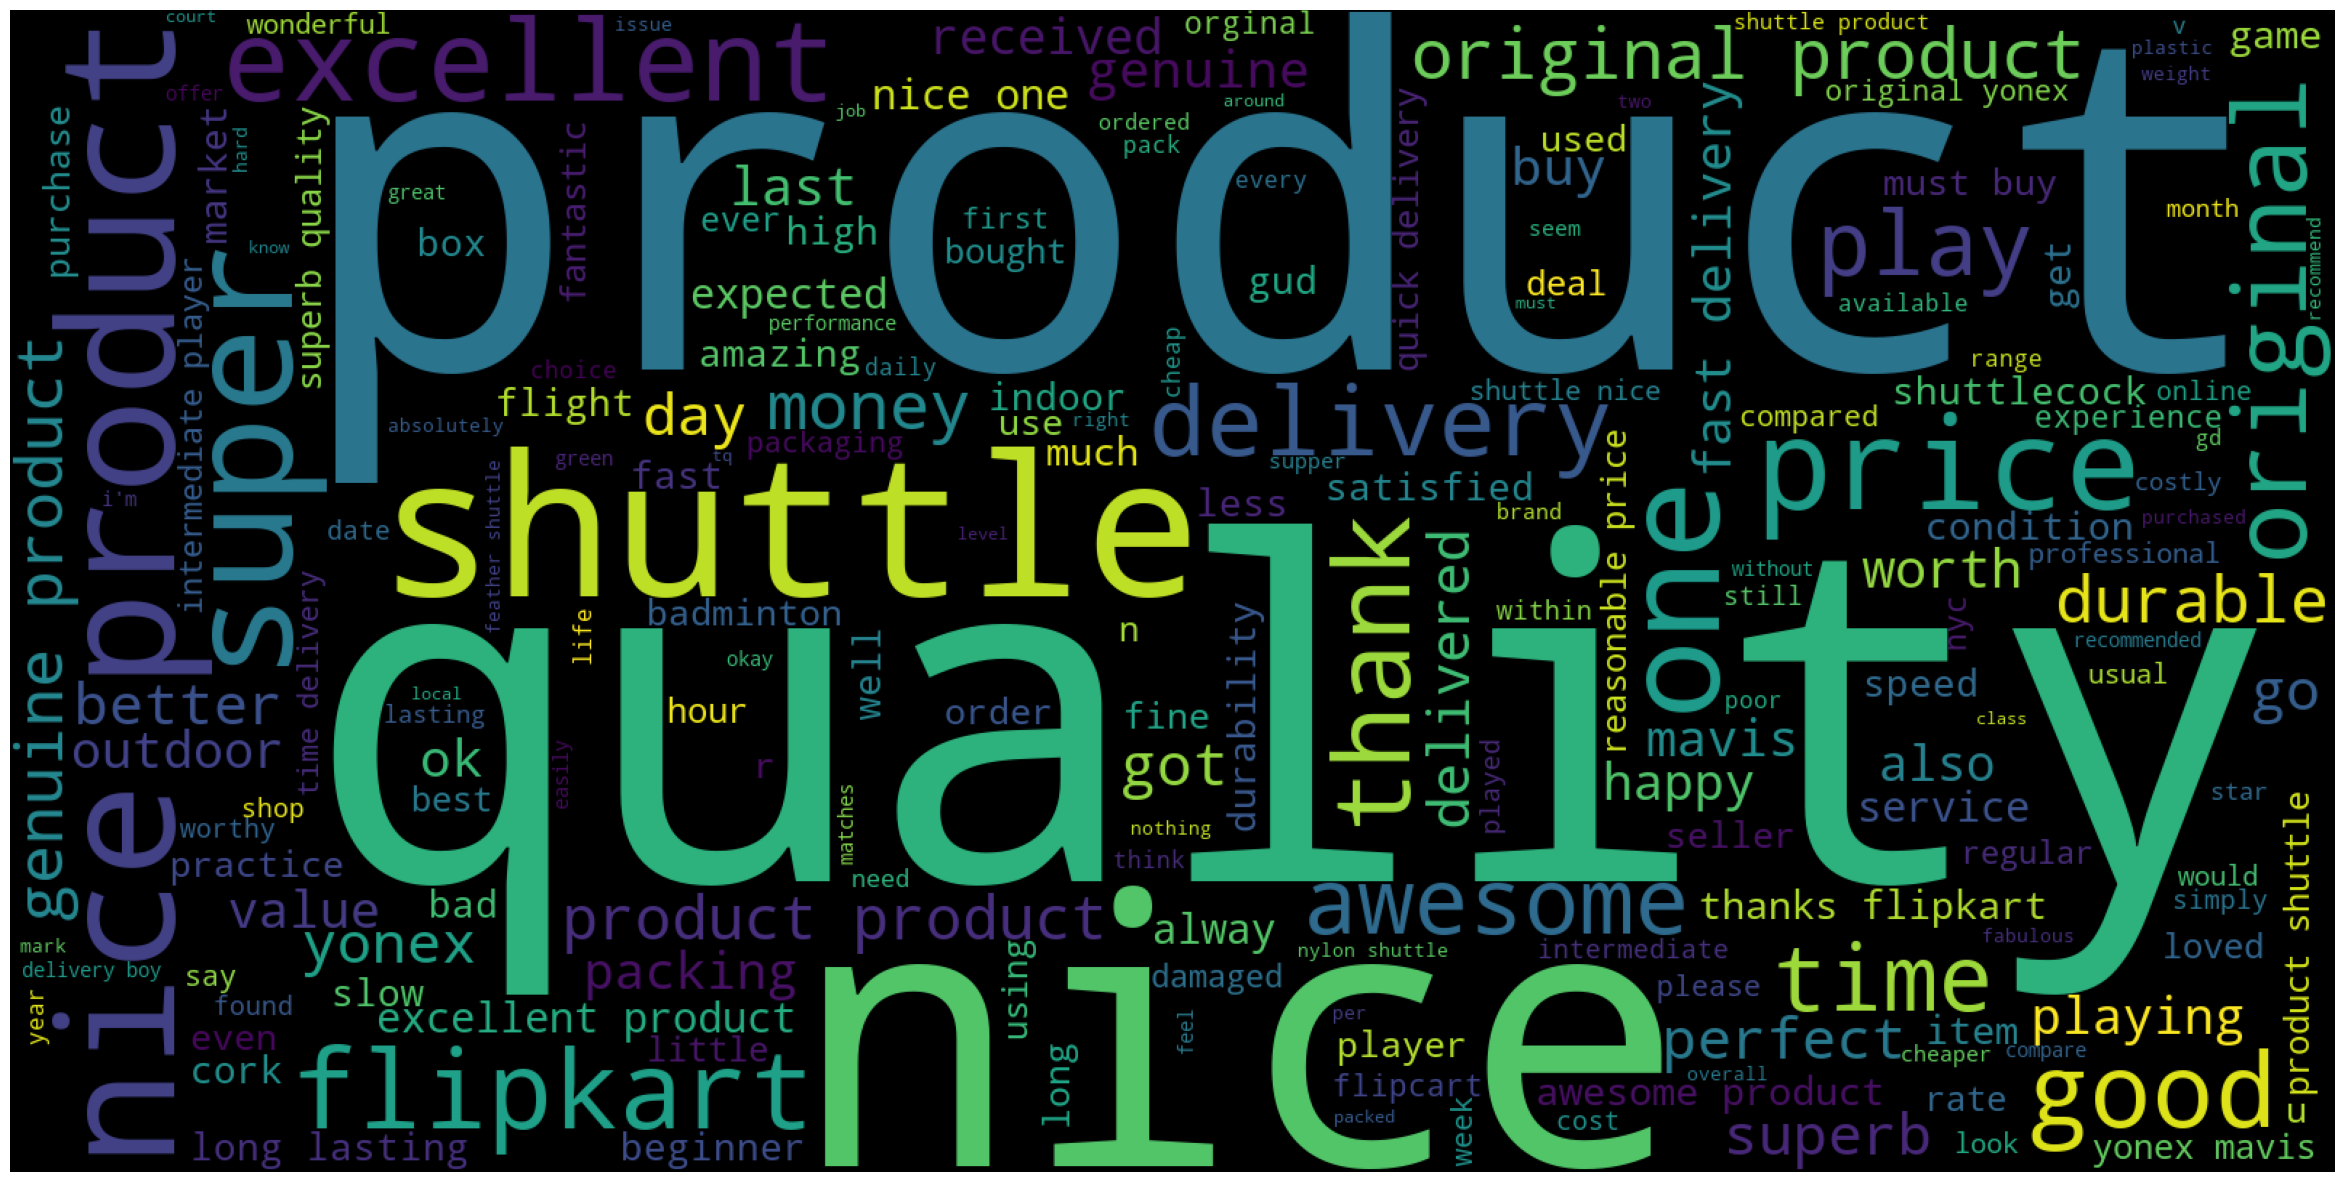

In [16]:
#creating a dataframe for positive sentiments
df_positive=df.loc[df["Sentiment"]=="Positive",:]

#joining the positive sentences 
words=" ".join(df_positive["Review text"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","really","good","best","br"]]) 
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

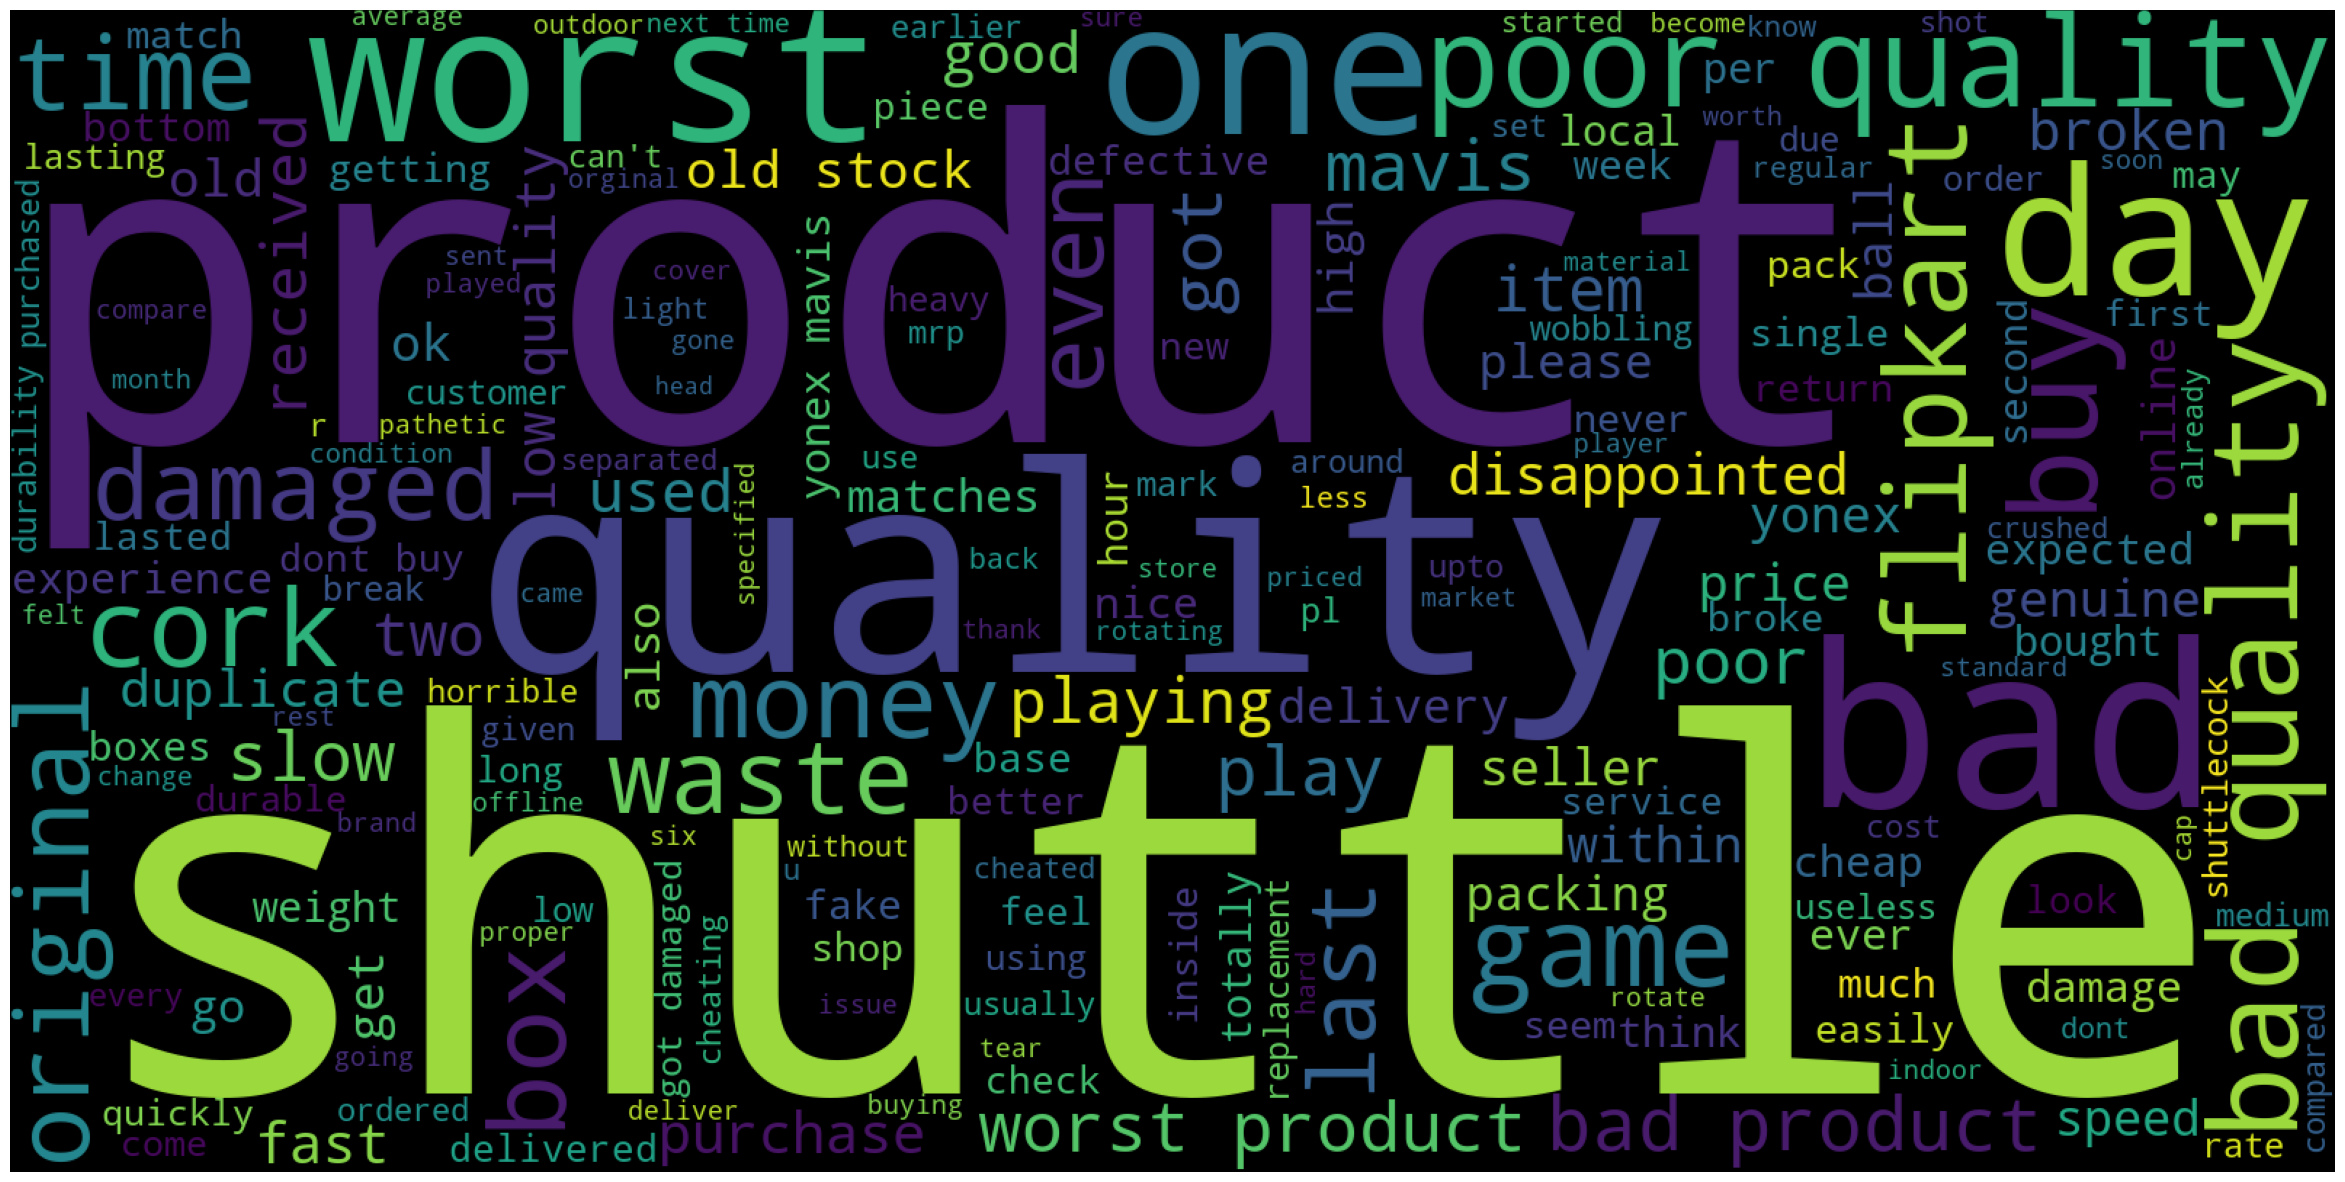

In [17]:
#creating a dataframe for negative sentiments
df_negative=df.loc[df["Sentiment"]=="Negative",:]

#joining the positive sentences 
words=" ".join(df_negative["Review text"]).lower()

#cleaned words
cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","really","good","best","br"]]) 
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

In [18]:
# splitting input and output variables
X=df[['Review text']]
y=df['Sentiment']

## Splitting the data- train-test-split

In [19]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [20]:
stemmer=PorterStemmer()

In [21]:
lemmatizer=WordNetLemmatizer()

## Data Cleaning

In [22]:
# Define preprocess function
def preprocess(text, flag):
    # remove special characters
    sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # convert sentence into lower case
    sentence = sentence.lower()
    # tokenize sentence into words
    tokens = sentence.split()
    # remove stop words
    clean_tokens = [token for token in tokens if token not in stopwords.words("english")]
    # stemming/lemmatization
    if flag == 'stem':
        clean_tokens = [stemmer.stem(token) for token in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
    return pd.Series(' '.join(clean_tokens))

### Text Cleaning on train data

In [23]:
X_train.head()

,Review text
1460,Valuable
2023,Super super nice
1790,Nice shuttle
8184,Good for club
3983,Excellent slow moving durable product


In [24]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [25]:
# Apply preprocess function to 'Review text' column in DataFrame
X_train_transformed= X_train['Review text'].progress_apply(lambda x: preprocess(x, flag='lemma'))

# Display the updated DataFrame
X_train_transformed.head()

100%|█████████████████████████████████████████████████████████████████████████████| 5927/5927 [00:30<00:00, 195.82it/s]


,0
1460,valuable
2023,super super nice
1790,nice shuttle
8184,good club
3983,excellent slow moving durable product


In [26]:
X_train_transformed.columns = ['Clean Review text']

X_train_transformed.head()

,Clean Review text
1460,valuable
2023,super super nice
1790,nice shuttle
8184,good club
3983,excellent slow moving durable product


In [27]:
X_train_transformed.to_csv(r'G:\python applications\Intern_tasks\reviews_data_dump\reviews_badminton\X_train_transformed.csv')

### Text Cleaning on test data

In [28]:
X_test.head()

,Review text
857,Good for indoor courts
2572,Awwssmm
3252,Good product
2036,"Excellent,original quality,fast delivery even ..."
7106,Third class product sent by flipkart. this tim...


In [29]:
# Apply preprocess function to 'Review text' column in DataFrame
X_test_transformed= X_test['Review text'].progress_apply(lambda x: preprocess(x, flag='lemma'))

# Display the updated DataFrame
X_test_transformed.head()

100%|█████████████████████████████████████████████████████████████████████████████| 1976/1976 [00:07<00:00, 255.59it/s]


,0
857,good indoor court
2572,awwssmm
3252,good product
2036,excellent original quality fast delivery even ...
7106,third class product sent flipkart time shuttle...


In [30]:
X_test_transformed.columns = ['Clean Review text']

X_test_transformed.head()

,Clean Review text
857,good indoor court
2572,awwssmm
3252,good product
2036,excellent original quality fast delivery even ...
7106,third class product sent flipkart time shuttle...


In [31]:
X_test_transformed.to_csv(r'G:\python applications\Intern_tasks\reviews_data_dump\reviews_badminton\X_test_transformed.csv')

## Text Embedding

### Bag of words

In [32]:
vocab = CountVectorizer()

# transformation on train data
X_train_bow = vocab.fit_transform(X_train_transformed['Clean Review text'])

print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 1987
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (5927, 1987)


In [33]:
# transformation on test data
X_test_bow = vocab.transform(X_test_transformed['Clean Review text'])

In [34]:
X_test_bow.shape

(1976, 1987)

### Tf - Idf

In [35]:
vectorizer = TfidfVectorizer()

# transformation on train data
X_train_dtm = vectorizer.fit_transform(X_train_transformed['Clean Review text'])

X_train_dtm.shape

(5927, 1987)

In [36]:
# transformation on test data
X_test_dtm = vectorizer.transform(X_test_transformed['Clean Review text'])

X_test_dtm.shape

(1976, 1987)

### word2vec

In [37]:
# train model
model = Word2Vec(list(X_train_transformed['Clean Review text']), vector_size=300, min_count=1)
print(model)

Word2Vec<vocab=27, vector_size=300, alpha=0.025>


In [38]:
print(model)

Word2Vec<vocab=27, vector_size=300, alpha=0.025>


In [39]:
# Checking the shape of vectors learned by the model

print(model.wv.__getitem__(model.wv.index_to_key).shape)

(27, 300)


In [40]:
import numpy as np

# Function to create a document vector from a list of word vectors
def document_vector(words, word_vectors):
    # Initialize an empty array to hold the document vector
    doc_vector = np.zeros(word_vectors.vector_size)

    # Count the number of words in the document
    num_words = 0

    # Loop through each word in the document
    for word in words:
        # Check if the word is in the word_vectors vocabulary
        if word in word_vectors:
            # Add the word vector to the document vector
            doc_vector += word_vectors[word]
            num_words += 1

    # Calculate the average of word vectors to get the document vector
    if num_words > 0:
        doc_vector /= num_words

    return doc_vector

X_train_transformed['doc_vector'] = X_train_transformed['Clean Review text'].apply(lambda x: document_vector(x, model.wv))
X_train_transformed.head()

,Clean Review text,doc_vector
1460,valuable,"[-0.15975571423768997, 0.22471544705331326, 0...."
2023,super super nice,"[-0.13224878248001914, 0.17769188666716218, -0..."
1790,nice shuttle,"[-0.16030894179129973, 0.21065172366797924, -0..."
8184,good club,"[-0.04546693906498452, 0.1113170427787635, -0...."
3983,excellent slow moving durable product,"[-0.11188807639268201, 0.1619903081902177, -0...."


In [41]:
# transformation on train data
X_train_w2v = list(X_train_transformed.doc_vector)

In [42]:
X_test_transformed['doc_vector'] = X_test_transformed['Clean Review text'].apply(lambda x: document_vector(x, model.wv))
X_test_transformed.head()

,Clean Review text,doc_vector
857,good indoor court,"[-0.03925621349309735, 0.08468913503319901, -0..."
2572,awwssmm,"[-0.15366141498088837, 0.23668063751288823, -0..."
3252,good product,"[-0.02616292895982042, 0.08105414147333552, -0..."
2036,excellent original quality fast delivery even ...,"[-0.13606172756197443, 0.18943566387600225, -0..."
7106,third class product sent flipkart time shuttle...,"[-0.13089614740762293, 0.18003059628466933, -0..."


In [43]:
# transformation on test data
X_test_w2v = list(X_test_transformed.doc_vector)

### Bert

In [44]:
! pip install -U sentence-transformers

In [45]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

C:\Users\Dell\anaconda3\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [46]:
X_train_transformed['doc_vector_pretrained_bert'] = X_train_transformed['Clean Review text'].apply(model.encode)

X_train_transformed.head()

,Clean Review text,doc_vector,doc_vector_pretrained_bert
1460,valuable,"[-0.15975571423768997, 0.22471544705331326, 0....","[-0.07875654, 0.09894952, -0.09886125, -0.0305..."
2023,super super nice,"[-0.13224878248001914, 0.17769188666716218, -0...","[-0.13002433, 0.048596736, -0.023960365, -0.02..."
1790,nice shuttle,"[-0.16030894179129973, 0.21065172366797924, -0...","[-0.023950798, 0.018781146, 0.0028281603, -0.0..."
8184,good club,"[-0.04546693906498452, 0.1113170427787635, -0....","[-0.061319377, 0.030648405, -0.016147703, 0.02..."
3983,excellent slow moving durable product,"[-0.11188807639268201, 0.1619903081902177, -0....","[-0.07296354, 0.008617383, 0.083044715, -0.018..."


In [47]:
# transformation on train data
X_train_bert = list(X_train_transformed.doc_vector_pretrained_bert)

In [48]:
X_test_transformed['doc_vector_pretrained_bert'] = X_test_transformed['Clean Review text'].apply(model.encode)

X_test_transformed.head()

,Clean Review text,doc_vector,doc_vector_pretrained_bert
857,good indoor court,"[-0.03925621349309735, 0.08468913503319901, -0...","[0.015205382, 0.07859223, -0.039294023, -0.085..."
2572,awwssmm,"[-0.15366141498088837, 0.23668063751288823, -0...","[0.010244257, 0.0023379202, -0.04976906, 0.096..."
3252,good product,"[-0.02616292895982042, 0.08105414147333552, -0...","[-0.11612558, 0.08051261, 0.05438116, -0.00239..."
2036,excellent original quality fast delivery even ...,"[-0.13606172756197443, 0.18943566387600225, -0...","[-0.08535812, 0.05455879, 0.03941467, 0.001437..."
7106,third class product sent flipkart time shuttle...,"[-0.13089614740762293, 0.18003059628466933, -0...","[-0.02879837, -0.041195028, 0.009486647, -0.04..."


In [49]:
# transformation on test data
X_test_bert = list(X_test_transformed.doc_vector_pretrained_bert)

## Model Training

In [50]:
# import the different classifiers from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [51]:
# evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score

## Model training on Bag of Words embedded data

In [52]:
lr_bow = LogisticRegression()
lr_bow.fit(X_train_bow,y_train)

LogisticRegression()

In [53]:
knn_bow = KNeighborsClassifier()
knn_bow.fit(X_train_bow,y_train)

KNeighborsClassifier()

In [54]:
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow,y_train)

MultinomialNB()

In [55]:
dt_bow = DecisionTreeClassifier()
dt_bow.fit(X_train_bow,y_train)

DecisionTreeClassifier()

In [56]:
rf_bow = RandomForestClassifier()
rf_bow.fit(X_train_bow,y_train)

RandomForestClassifier()

## Model Evaluation on Bag of Words embedded data

Evaluation Metrics for LogisticRegression() model

Train accuracy:  0.9488780158596254

Test accuracy:  0.9286437246963563

Confusion Matrix - Train:
[[ 545  259]
 [  44 5079]]


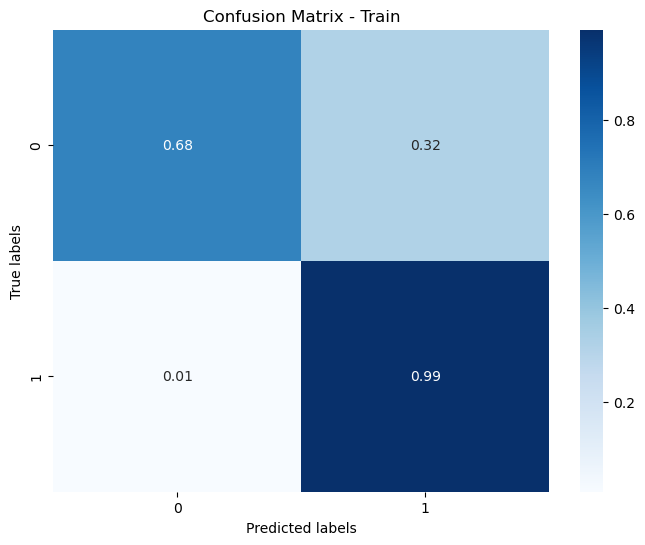

Confusion Matrix - Test:
[[ 166  107]
 [  34 1669]]


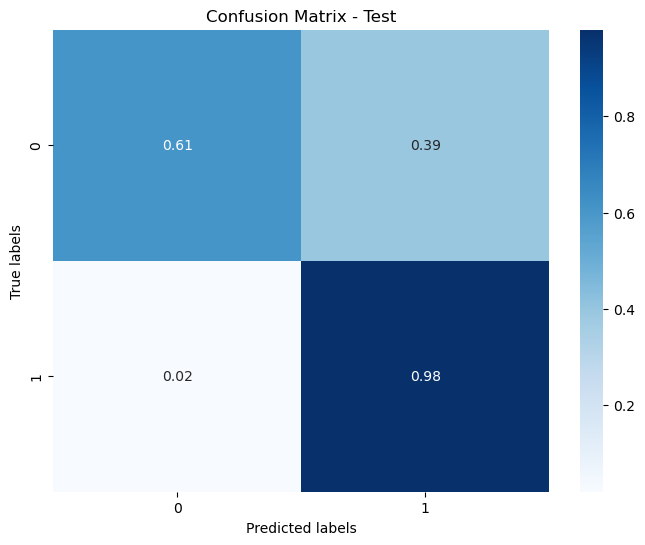

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.93      0.68      0.78       804
    Positive       0.95      0.99      0.97      5123

    accuracy                           0.95      5927
   macro avg       0.94      0.83      0.88      5927
weighted avg       0.95      0.95      0.95      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.83      0.61      0.70       273
    Positive       0.94      0.98      0.96      1703

    accuracy                           0.93      1976
   macro avg       0.88      0.79      0.83      1976
weighted avg       0.92      0.93      0.92      1976


Precision - Train: 0.9479282417957228
Precision - Test: 0.9245891121384542

Recall - Train: 0.9488780158596254
Recall - Test: 0.9286437246963563

F1 Score - Train: 0.9454581949887177
F1 Score - Test: 0.9238860094711236

--------------------------------------------------
Evaluation M

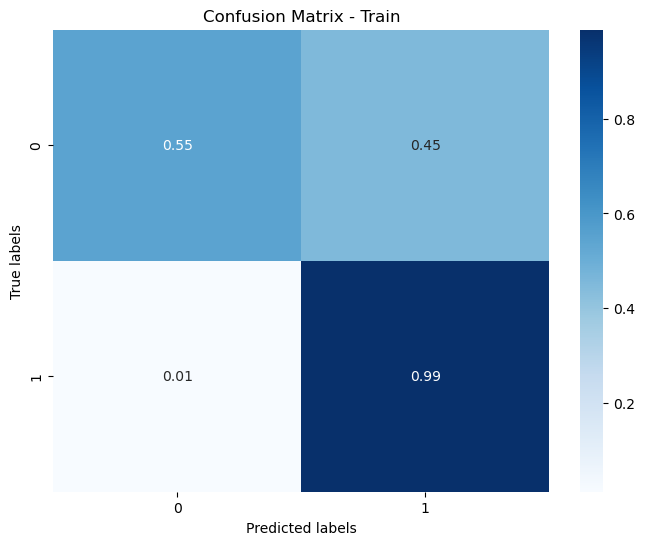

Confusion Matrix - Test:
[[ 127  146]
 [  19 1684]]


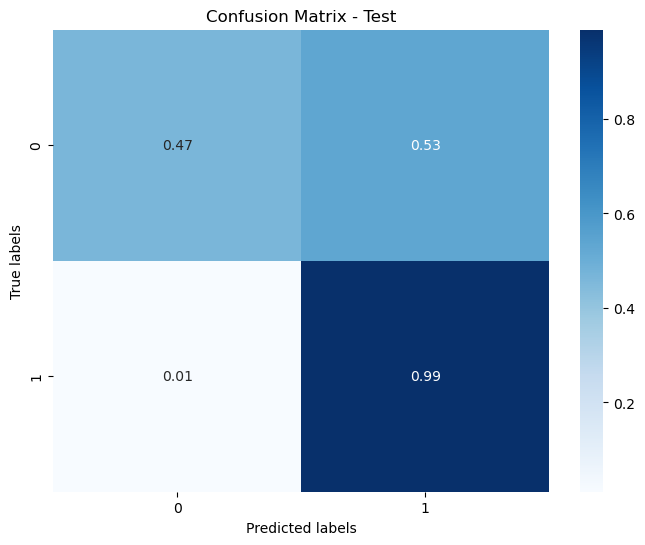

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.88      0.55      0.68       804
    Positive       0.93      0.99      0.96      5123

    accuracy                           0.93      5927
   macro avg       0.91      0.77      0.82      5927
weighted avg       0.93      0.93      0.92      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.87      0.47      0.61       273
    Positive       0.92      0.99      0.95      1703

    accuracy                           0.92      1976
   macro avg       0.90      0.73      0.78      1976
weighted avg       0.91      0.92      0.91      1976


Precision - Train: 0.9262490182763199
Precision - Test: 0.9132615603121884

Recall - Train: 0.9288004049266071
Recall - Test: 0.916497975708502

F1 Score - Train: 0.9214659993722244
F1 Score - Test: 0.9053439490769696

--------------------------------------------------
Evaluation Me

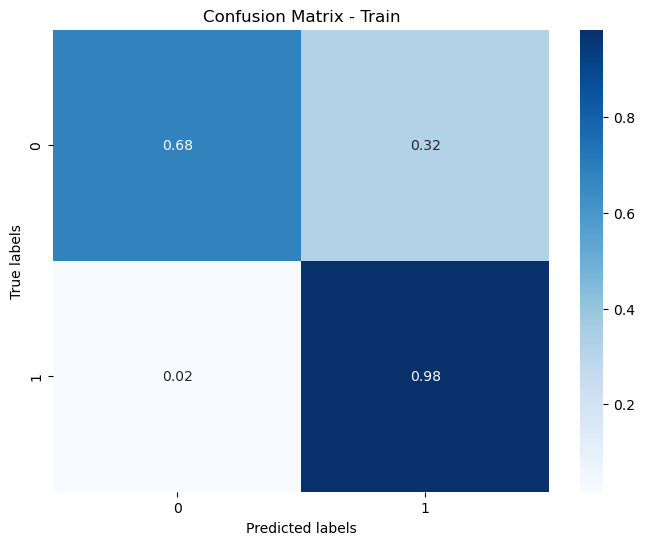

Confusion Matrix - Test:
[[ 166  107]
 [  32 1671]]


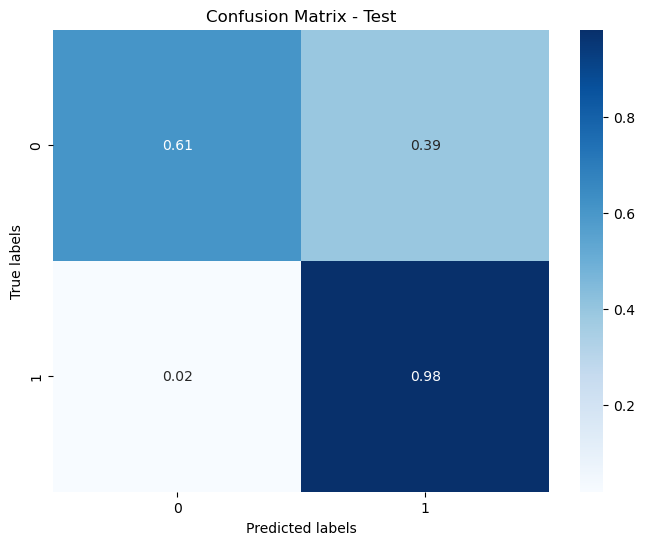

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.86      0.68      0.76       804
    Positive       0.95      0.98      0.97      5123

    accuracy                           0.94      5927
   macro avg       0.91      0.83      0.86      5927
weighted avg       0.94      0.94      0.94      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.84      0.61      0.70       273
    Positive       0.94      0.98      0.96      1703

    accuracy                           0.93      1976
   macro avg       0.89      0.79      0.83      1976
weighted avg       0.93      0.93      0.92      1976


Precision - Train: 0.9386627603510058
Precision - Test: 0.9258058128499488

Recall - Train: 0.9412856419773916
Recall - Test: 0.9296558704453441

F1 Score - Train: 0.9382941834505908
F1 Score - Test: 0.9248130240663771

--------------------------------------------------
Evaluation M

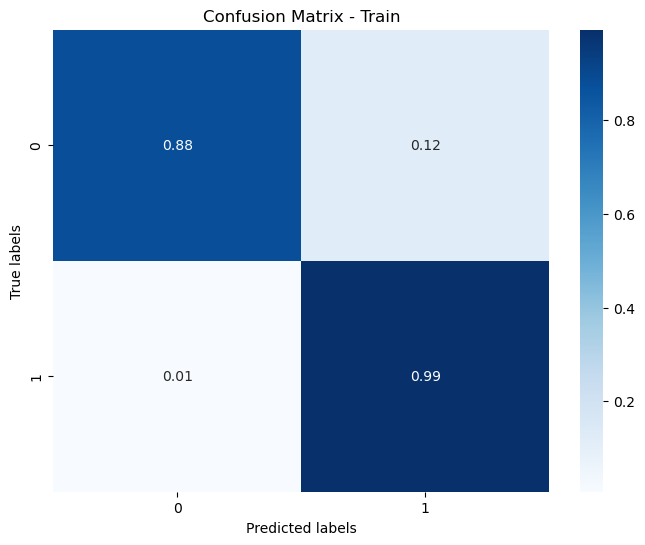

Confusion Matrix - Test:
[[ 178   95]
 [  81 1622]]


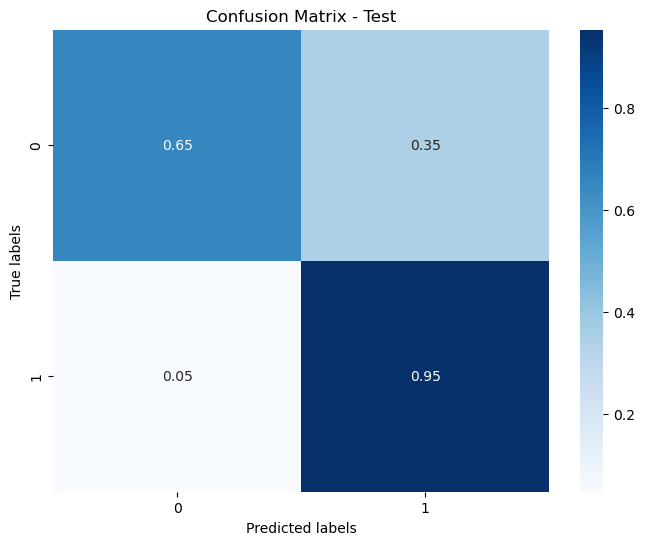

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.95      0.88      0.91       804
    Positive       0.98      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.97      0.94      0.95      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.69      0.65      0.67       273
    Positive       0.94      0.95      0.95      1703

    accuracy                           0.91      1976
   macro avg       0.82      0.80      0.81      1976
weighted avg       0.91      0.91      0.91      1976


Precision - Train: 0.977081787683166
Precision - Test: 0.9091074030840454

Recall - Train: 0.9773915977729036
Recall - Test: 0.9109311740890689

F1 Score - Train: 0.9770062517204695
F1 Score - Test: 0.9099415204678363

--------------------------------------------------
Evaluation Me

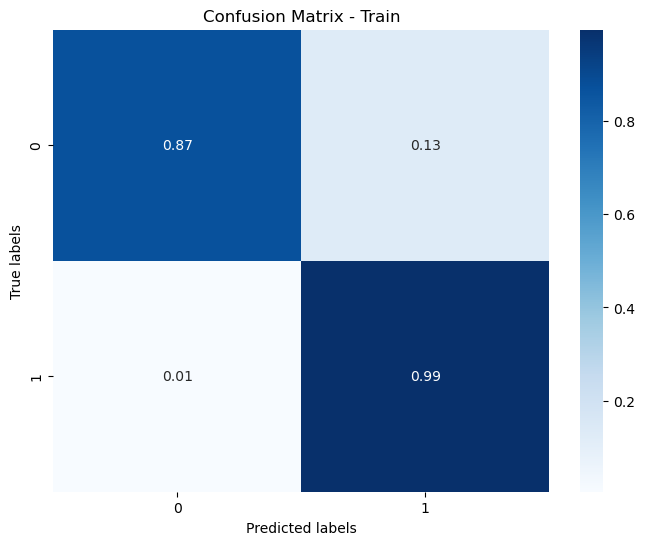

Confusion Matrix - Test:
[[ 170  103]
 [  39 1664]]


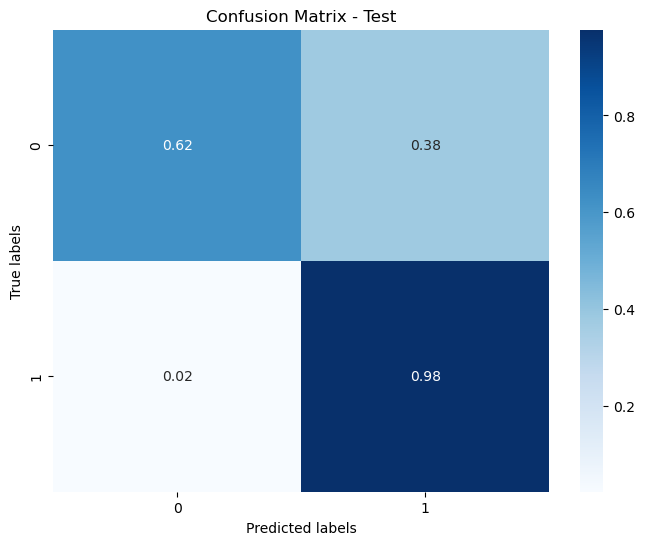

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.96      0.87      0.91       804
    Positive       0.98      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.97      0.93      0.95      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.81      0.62      0.71       273
    Positive       0.94      0.98      0.96      1703

    accuracy                           0.93      1976
   macro avg       0.88      0.80      0.83      1976
weighted avg       0.92      0.93      0.92      1976


Precision - Train: 0.9771397735839803
Precision - Test: 0.9239817981440714

Recall - Train: 0.9773915977729036
Recall - Test: 0.9281376518218624

F1 Score - Train: 0.9769140468125291
F1 Score - Test: 0.9240294150781069

--------------------------------------------------


In [57]:
models = [lr_bow,knn_bow,nb_bow,dt_bow,rf_bow]
for model in models:
    print(f"Evaluation Metrics for {model} model")
    y_train_pred = model.predict(X_train_bow)
    y_test_pred = model.predict(X_test_bow)
    
    print()
    print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
    print()
    print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
    print()
    
    print('Confusion Matrix - Train:')
    train_cm = confusion_matrix(y_train, y_train_pred)
    print(train_cm)
    train_cm_norm = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm_norm, annot=True, fmt= '.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Train')
    plt.show()
    
    print('Confusion Matrix - Test:')
    test_cm = confusion_matrix(y_test, y_test_pred)
    print(test_cm)
    test_cm_norm = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Test')
    plt.show()
    
    print('Classification Report - Train:')
    print(classification_report(y_train, y_train_pred))
    print()
    
    print('Classification Report - Test:')
    print(classification_report(y_test, y_test_pred))
    print()
    
    print('Precision - Train:', precision_score(y_train, y_train_pred, average='weighted'))
    print('Precision - Test:', precision_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('Recall - Train:', recall_score(y_train, y_train_pred, average='weighted'))
    print('Recall - Test:', recall_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('F1 Score - Train:', f1_score(y_train, y_train_pred, average='weighted'))
    print('F1 Score - Test:', f1_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('-'*50)

## Model training on TF-IDF embedded data

In [58]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_dtm,y_train)

LogisticRegression()

In [59]:
knn_tfidf = KNeighborsClassifier()
knn_tfidf.fit(X_train_dtm,y_train)

KNeighborsClassifier()

In [60]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_dtm,y_train)

MultinomialNB()

In [61]:
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [62]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_dtm,y_train)

RandomForestClassifier()

## Model Evaluation on TF-IDF embedded data

Evaluation Metrics for LogisticRegression() model

Train accuracy:  0.9306563185422642

Test accuracy:  0.9210526315789473

Confusion Matrix - Train:
[[ 433  371]
 [  40 5083]]


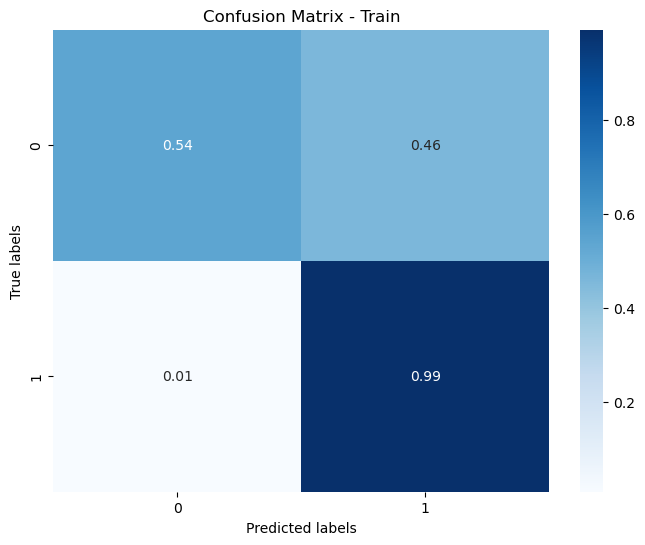

Confusion Matrix - Test:
[[ 137  136]
 [  20 1683]]


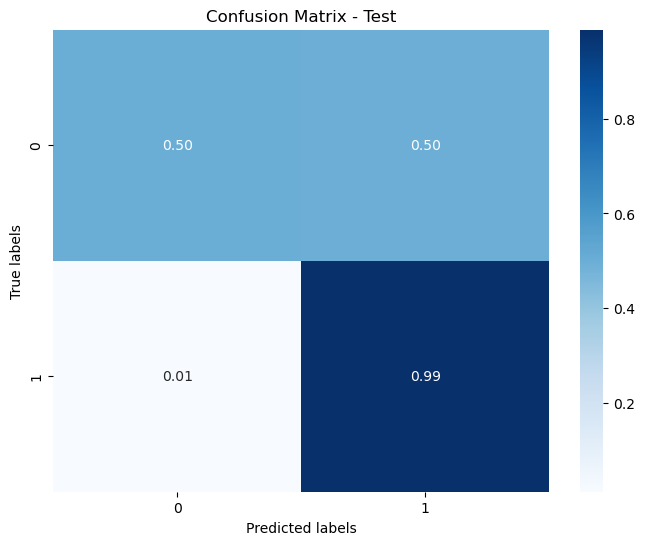

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.92      0.54      0.68       804
    Positive       0.93      0.99      0.96      5123

    accuracy                           0.93      5927
   macro avg       0.92      0.77      0.82      5927
weighted avg       0.93      0.93      0.92      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.87      0.50      0.64       273
    Positive       0.93      0.99      0.96      1703

    accuracy                           0.92      1976
   macro avg       0.90      0.75      0.80      1976
weighted avg       0.92      0.92      0.91      1976


Precision - Train: 0.9297324489460285
Precision - Test: 0.9179634752695178

Recall - Train: 0.9306563185422642
Recall - Test: 0.9210526315789473

F1 Score - Train: 0.9227543655882677
F1 Score - Test: 0.9117040153968377

--------------------------------------------------
Evaluation M

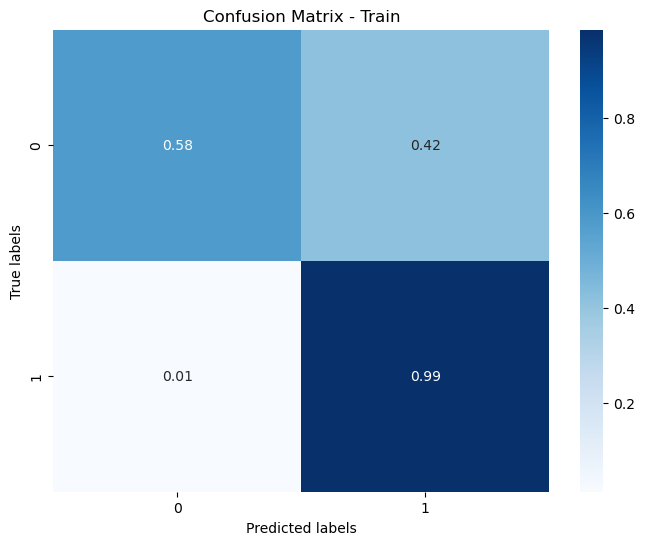

Confusion Matrix - Test:
[[ 124  149]
 [  39 1664]]


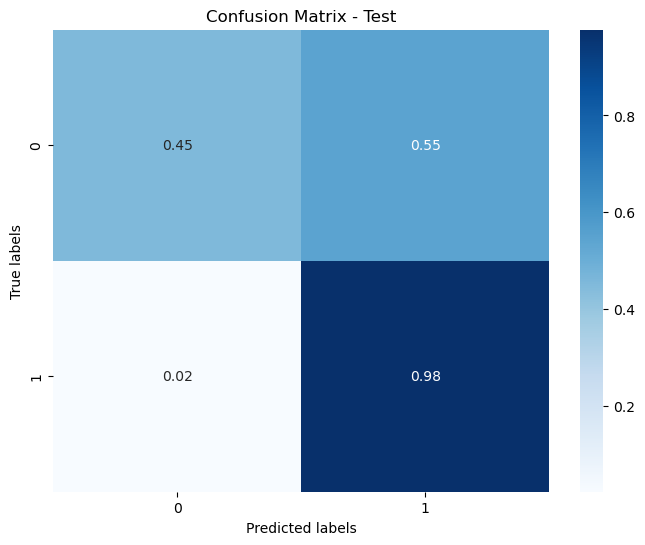

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.87      0.58      0.70       804
    Positive       0.94      0.99      0.96      5123

    accuracy                           0.93      5927
   macro avg       0.91      0.78      0.83      5927
weighted avg       0.93      0.93      0.93      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.76      0.45      0.57       273
    Positive       0.92      0.98      0.95      1703

    accuracy                           0.90      1976
   macro avg       0.84      0.72      0.76      1976
weighted avg       0.90      0.90      0.89      1976


Precision - Train: 0.9289190812462403
Precision - Test: 0.8961139910676329

Recall - Train: 0.9318373544795006
Recall - Test: 0.9048582995951417

F1 Score - Train: 0.9258898168153854
F1 Score - Test: 0.8943447598863772

--------------------------------------------------
Evaluation M

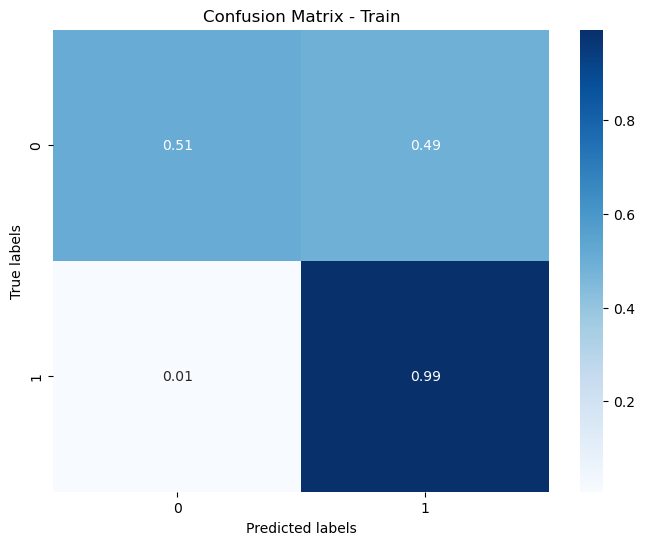

Confusion Matrix - Test:
[[ 100  173]
 [  17 1686]]


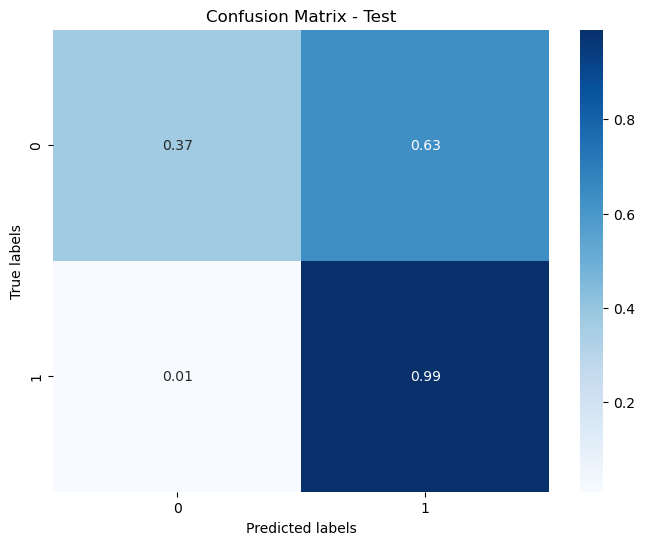

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.92      0.51      0.66       804
    Positive       0.93      0.99      0.96      5123

    accuracy                           0.93      5927
   macro avg       0.92      0.75      0.81      5927
weighted avg       0.93      0.93      0.92      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.85      0.37      0.51       273
    Positive       0.91      0.99      0.95      1703

    accuracy                           0.90      1976
   macro avg       0.88      0.68      0.73      1976
weighted avg       0.90      0.90      0.89      1976


Precision - Train: 0.9273789831263629
Precision - Test: 0.8997220727989959

Recall - Train: 0.9277880884089759
Recall - Test: 0.9038461538461539

F1 Score - Train: 0.9186663102450365
F1 Score - Test: 0.8867209432902864

--------------------------------------------------
Evaluation M

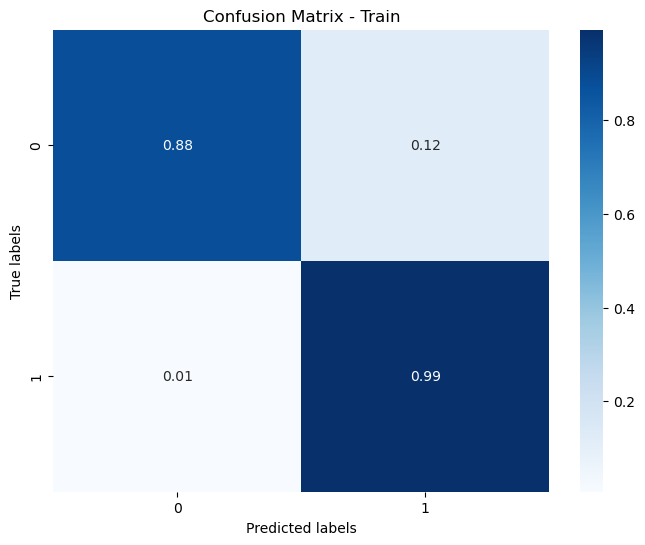

Confusion Matrix - Test:
[[ 165  108]
 [  62 1641]]


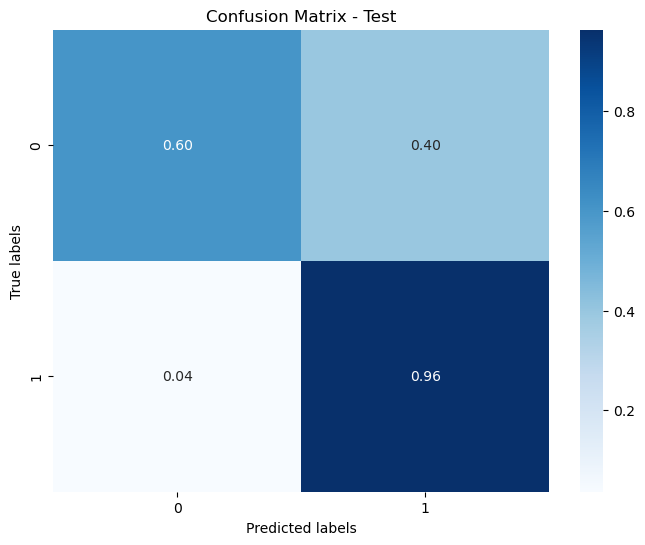

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.95      0.88      0.91       804
    Positive       0.98      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.97      0.94      0.95      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66       273
    Positive       0.94      0.96      0.95      1703

    accuracy                           0.91      1976
   macro avg       0.83      0.78      0.81      1976
weighted avg       0.91      0.91      0.91      1976


Precision - Train: 0.977081787683166
Precision - Test: 0.909046864181407

Recall - Train: 0.9773915977729036
Recall - Test: 0.9139676113360324

F1 Score - Train: 0.9770062517204695
F1 Score - Test: 0.9105833384155638

--------------------------------------------------
Evaluation Met

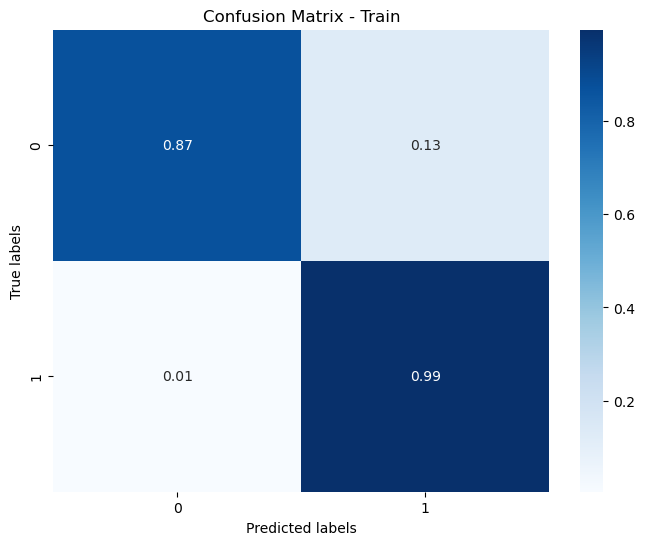

Confusion Matrix - Test:
[[ 157  116]
 [  30 1673]]


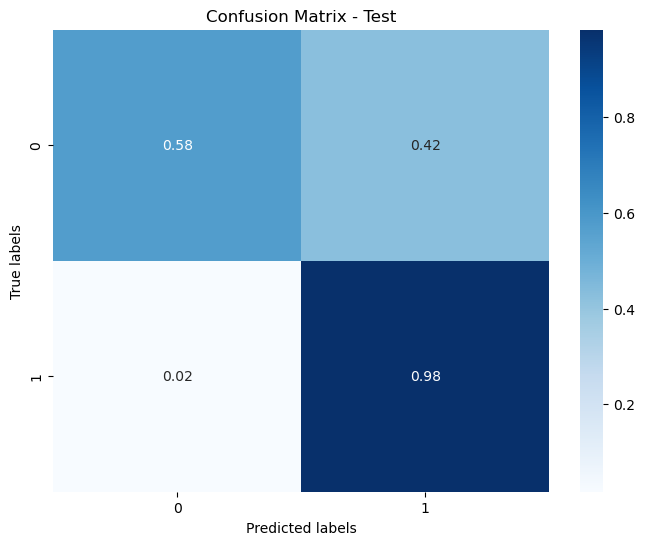

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.96      0.87      0.91       804
    Positive       0.98      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.97      0.93      0.95      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.84      0.58      0.68       273
    Positive       0.94      0.98      0.96      1703

    accuracy                           0.93      1976
   macro avg       0.89      0.78      0.82      1976
weighted avg       0.92      0.93      0.92      1976


Precision - Train: 0.9771522574366036
Precision - Test: 0.9219531923911284

Recall - Train: 0.9773915977729036
Recall - Test: 0.9261133603238867

F1 Score - Train: 0.9769007107935056
F1 Score - Test: 0.9201163955009293

--------------------------------------------------


In [63]:
models = [lr_tfidf,knn_tfidf,nb_tfidf,dt_tfidf,rf_tfidf]
for model in models:
    print(f"Evaluation Metrics for {model} model")
    y_train_pred = model.predict(X_train_dtm)
    y_test_pred = model.predict(X_test_dtm)
    
    print()
    print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
    print()
    print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
    print()
    
    print('Confusion Matrix - Train:')
    train_cm = confusion_matrix(y_train, y_train_pred)
    print(train_cm)
    train_cm_norm = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm_norm, annot=True, fmt= '.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Train')
    plt.show()
    
    print('Confusion Matrix - Test:')
    test_cm = confusion_matrix(y_test, y_test_pred)
    print(test_cm)
    test_cm_norm = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Test')
    plt.show()
    
    print('Classification Report - Train:')
    print(classification_report(y_train, y_train_pred))
    print()
    
    print('Classification Report - Test:')
    print(classification_report(y_test, y_test_pred))
    print()
    
    print('Precision - Train:', precision_score(y_train, y_train_pred, average='weighted'))
    print('Precision - Test:', precision_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('Recall - Train:', recall_score(y_train, y_train_pred, average='weighted'))
    print('Recall - Test:', recall_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('F1 Score - Train:', f1_score(y_train, y_train_pred, average='weighted'))
    print('F1 Score - Test:', f1_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('-'*50)

## Model training on Word2Vec embedded data

In [64]:
lr_w2v = LogisticRegression()
lr_w2v.fit(X_train_w2v,y_train)

LogisticRegression()

In [65]:
knn_w2v = KNeighborsClassifier()
knn_w2v.fit(X_train_w2v,y_train)

KNeighborsClassifier()

In [66]:
dt_w2v = DecisionTreeClassifier()
dt_w2v.fit(X_train_w2v,y_train)

DecisionTreeClassifier()

In [67]:
rf_w2v = RandomForestClassifier()
rf_w2v.fit(X_train_w2v,y_train)

RandomForestClassifier()

## Model Evaluation on Word2Vec embedded data

Evaluation Metrics for LogisticRegression() model

Train accuracy:  0.8685675721275519

Test accuracy:  0.8618421052631579

Confusion Matrix - Train:
[[  33  771]
 [   8 5115]]


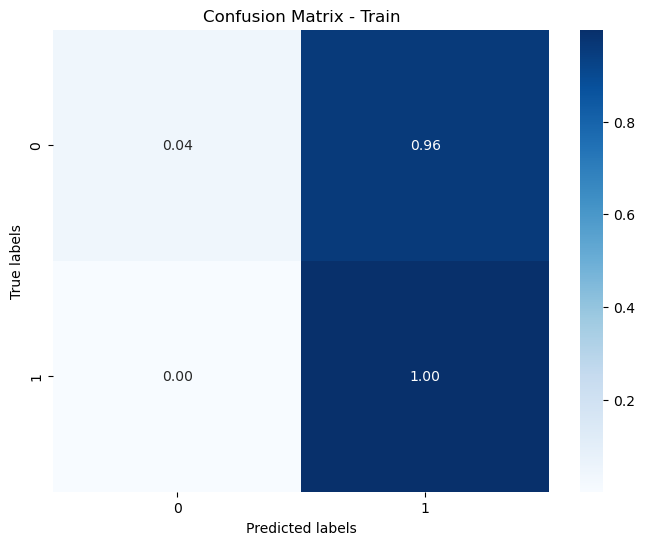

Confusion Matrix - Test:
[[   5  268]
 [   5 1698]]


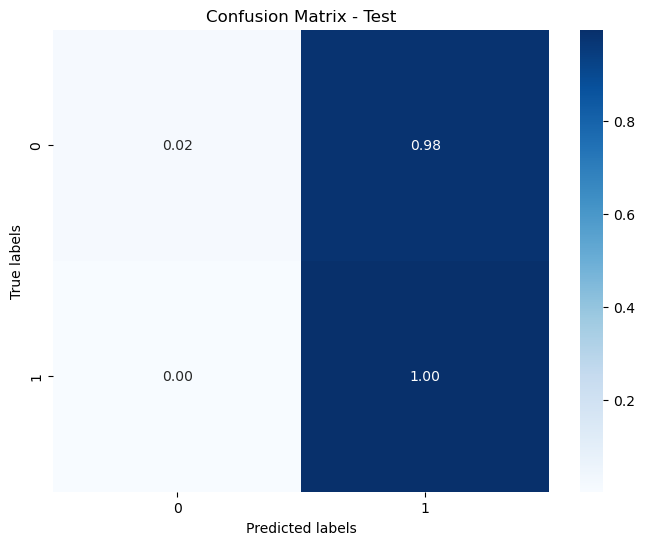

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.80      0.04      0.08       804
    Positive       0.87      1.00      0.93      5123

    accuracy                           0.87      5927
   macro avg       0.84      0.52      0.50      5927
weighted avg       0.86      0.87      0.81      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.50      0.02      0.04       273
    Positive       0.86      1.00      0.93      1703

    accuracy                           0.86      1976
   macro avg       0.68      0.51      0.48      1976
weighted avg       0.81      0.86      0.80      1976


Precision - Train: 0.8603115228047843
Precision - Test: 0.8134369813139155

Recall - Train: 0.8685675721275519
Recall - Test: 0.8618421052631579

F1 Score - Train: 0.8137831420011887
F1 Score - Test: 0.8025967557223758

--------------------------------------------------
Evaluation M

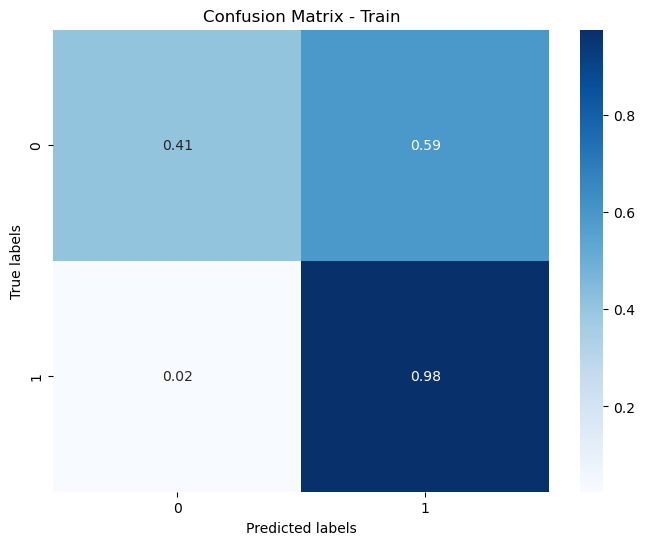

Confusion Matrix - Test:
[[  80  193]
 [  65 1638]]


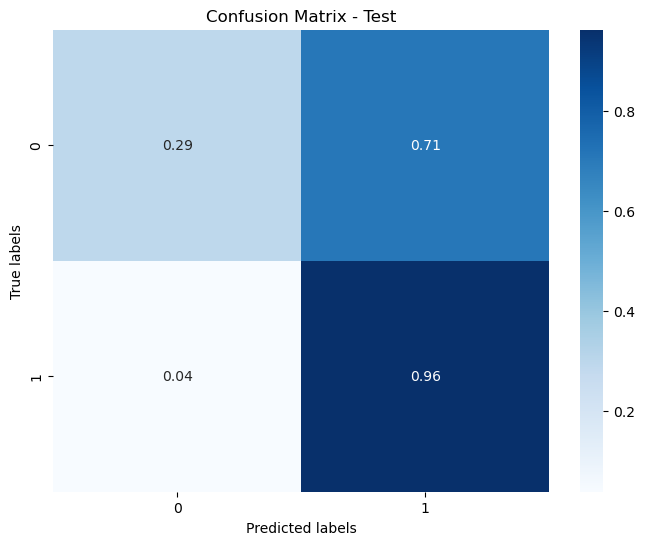

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.72      0.41      0.52       804
    Positive       0.91      0.98      0.94      5123

    accuracy                           0.90      5927
   macro avg       0.82      0.69      0.73      5927
weighted avg       0.89      0.90      0.89      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.55      0.29      0.38       273
    Positive       0.89      0.96      0.93      1703

    accuracy                           0.87      1976
   macro avg       0.72      0.63      0.65      1976
weighted avg       0.85      0.87      0.85      1976


Precision - Train: 0.8874049240834714
Precision - Test: 0.8472230619864979

Recall - Train: 0.8985996288172768
Recall - Test: 0.8694331983805668

F1 Score - Train: 0.8862153954293807
F1 Score - Test: 0.8518066465747639

--------------------------------------------------
Evaluation M

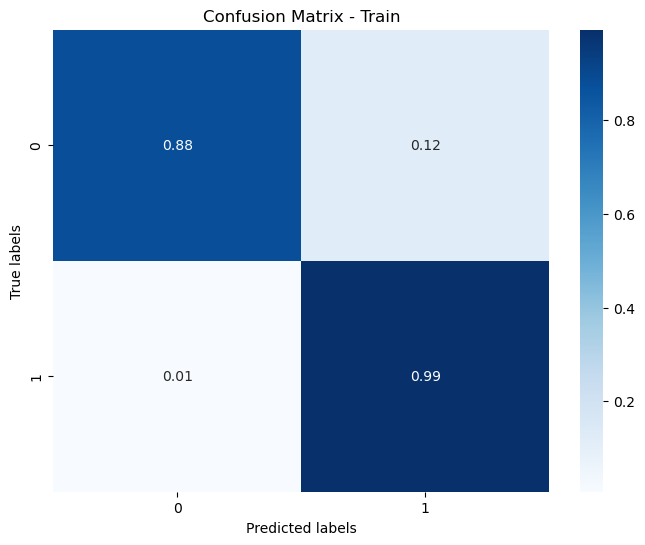

Confusion Matrix - Test:
[[ 120  153]
 [ 151 1552]]


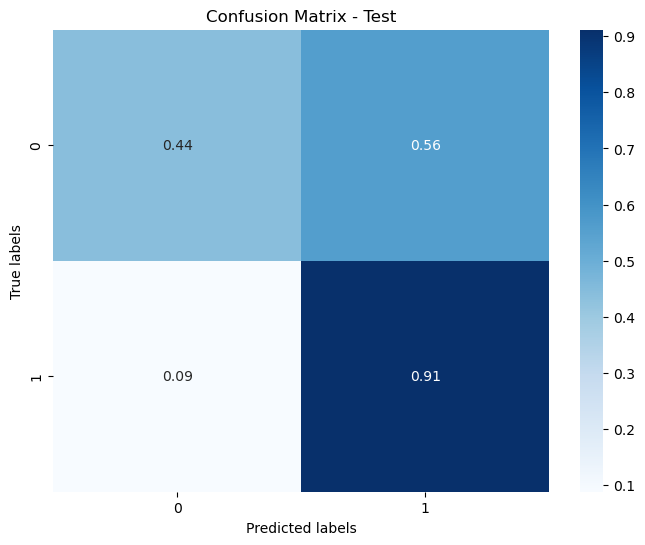

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.95      0.88      0.91       804
    Positive       0.98      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.97      0.94      0.95      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.44      0.44      0.44       273
    Positive       0.91      0.91      0.91      1703

    accuracy                           0.85      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.85      0.85      0.85      1976


Precision - Train: 0.977081787683166
Precision - Test: 0.8456807090065036

Recall - Train: 0.9773915977729036
Recall - Test: 0.8461538461538461

F1 Score - Train: 0.9770062517204695
F1 Score - Test: 0.8459161833747583

--------------------------------------------------
Evaluation Me

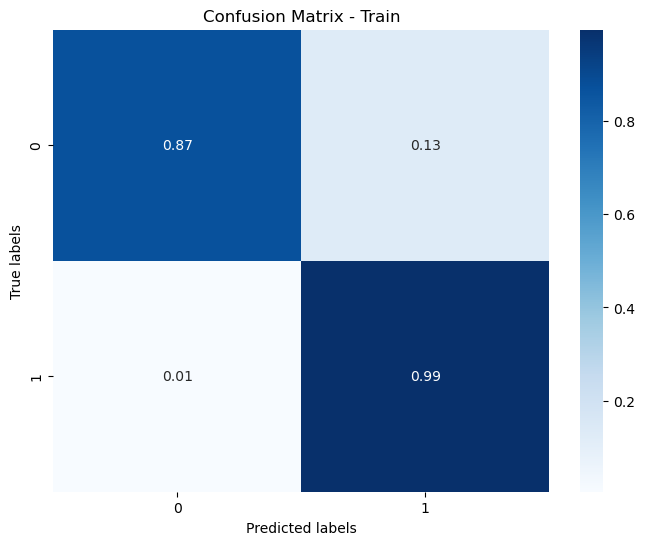

Confusion Matrix - Test:
[[  74  199]
 [  30 1673]]


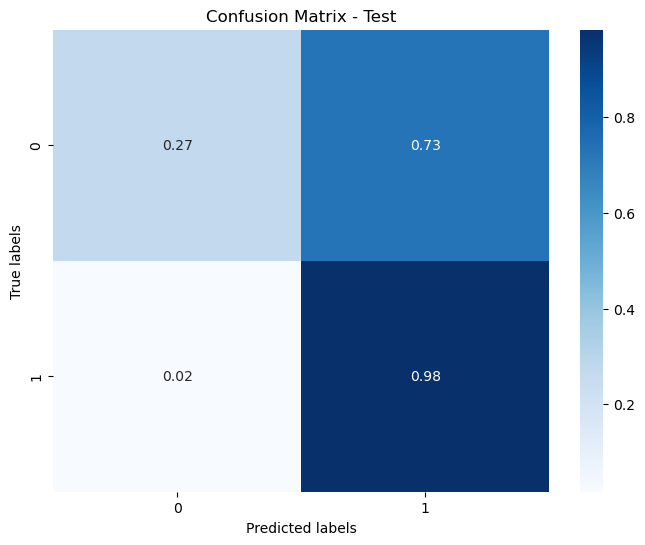

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.96      0.87      0.91       804
    Positive       0.98      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.97      0.93      0.95      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.71      0.27      0.39       273
    Positive       0.89      0.98      0.94      1703

    accuracy                           0.88      1976
   macro avg       0.80      0.63      0.66      1976
weighted avg       0.87      0.88      0.86      1976


Precision - Train: 0.9771397735839803
Precision - Test: 0.8685299988753936

Recall - Train: 0.9773915977729036
Recall - Test: 0.8841093117408907

F1 Score - Train: 0.9769140468125291
F1 Score - Test: 0.8608730470980925

--------------------------------------------------


In [68]:
models = [lr_w2v,knn_w2v,dt_w2v,rf_w2v]
for model in models:
    print(f"Evaluation Metrics for {model} model")
    y_train_pred = model.predict(X_train_w2v)
    y_test_pred = model.predict(X_test_w2v)
    
    print()
    print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
    print()
    print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
    print()
    
    print('Confusion Matrix - Train:')
    train_cm = confusion_matrix(y_train, y_train_pred)
    print(train_cm)
    train_cm_norm = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm_norm, annot=True, fmt= '.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Train')
    plt.show()
    
    print('Confusion Matrix - Test:')
    test_cm = confusion_matrix(y_test, y_test_pred)
    print(test_cm)
    test_cm_norm = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Test')
    plt.show()
    
    print('Classification Report - Train:')
    print(classification_report(y_train, y_train_pred))
    print()
    
    print('Classification Report - Test:')
    print(classification_report(y_test, y_test_pred))
    print()
    
    print('Precision - Train:', precision_score(y_train, y_train_pred, average='weighted'))
    print('Precision - Test:', precision_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('Recall - Train:', recall_score(y_train, y_train_pred, average='weighted'))
    print('Recall - Test:', recall_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('F1 Score - Train:', f1_score(y_train, y_train_pred, average='weighted'))
    print('F1 Score - Test:', f1_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('-'*50)

## Model training on Bert embedded data

In [69]:
lr_bert = LogisticRegression()
lr_bert.fit(X_train_bert,y_train)

LogisticRegression()

In [70]:
knn_bert = KNeighborsClassifier()
knn_bert.fit(X_train_bert,y_train)

KNeighborsClassifier()

In [71]:
dt_bert = DecisionTreeClassifier()
dt_bert.fit(X_train_bert,y_train)

DecisionTreeClassifier()

In [72]:
rf_bert = RandomForestClassifier()
rf_bert.fit(X_train_bert,y_train)

RandomForestClassifier()

## Model Evaluation on Bert embedded data

Evaluation Metrics for LogisticRegression() model

Train accuracy:  0.9335245486755526

Test accuracy:  0.9276315789473685

Confusion Matrix - Train:
[[ 492  312]
 [  82 5041]]


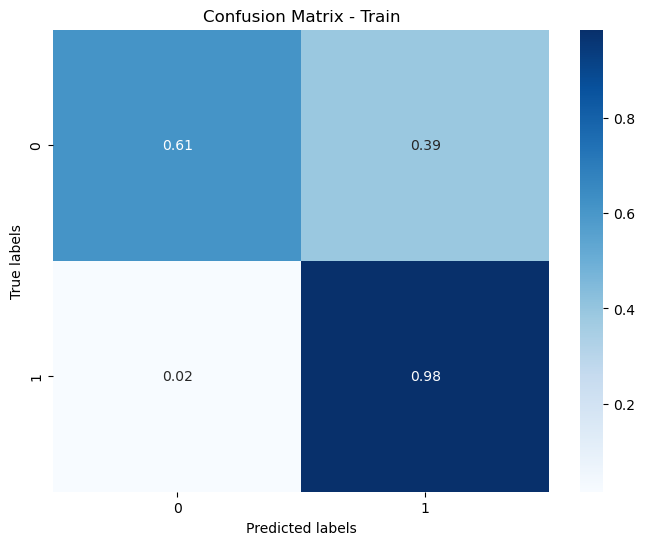

Confusion Matrix - Test:
[[ 160  113]
 [  30 1673]]


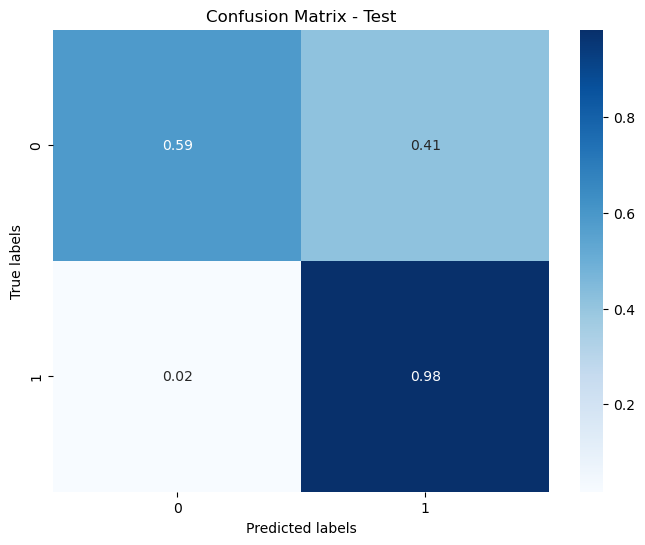

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.86      0.61      0.71       804
    Positive       0.94      0.98      0.96      5123

    accuracy                           0.93      5927
   macro avg       0.90      0.80      0.84      5927
weighted avg       0.93      0.93      0.93      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.84      0.59      0.69       273
    Positive       0.94      0.98      0.96      1703

    accuracy                           0.93      1976
   macro avg       0.89      0.78      0.83      1976
weighted avg       0.92      0.93      0.92      1976


Precision - Train: 0.9302426900817696
Precision - Test: 0.9236569517298285

Recall - Train: 0.9335245486755526
Recall - Test: 0.9276315789473685

F1 Score - Train: 0.9287066200701154
F1 Score - Test: 0.9220057806517262

--------------------------------------------------
Evaluation M

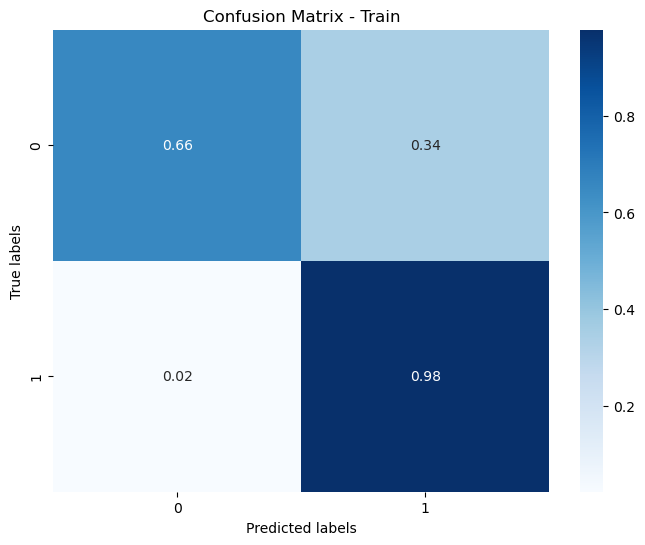

Confusion Matrix - Test:
[[ 161  112]
 [  40 1663]]


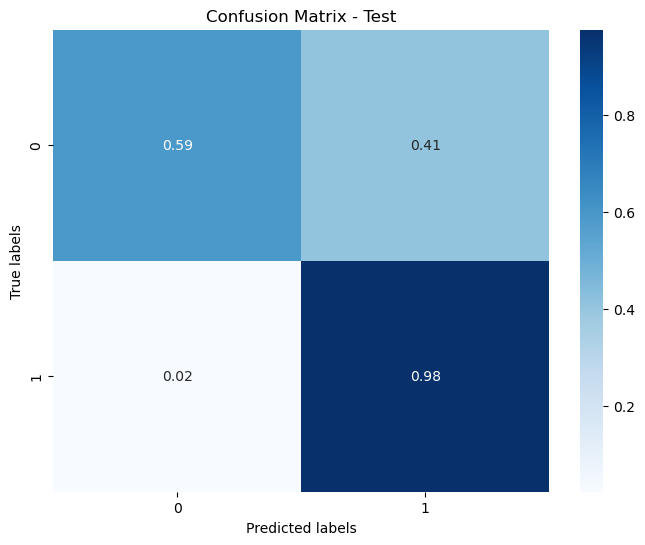

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.82      0.66      0.73       804
    Positive       0.95      0.98      0.96      5123

    accuracy                           0.93      5927
   macro avg       0.89      0.82      0.85      5927
weighted avg       0.93      0.93      0.93      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.80      0.59      0.68       273
    Positive       0.94      0.98      0.96      1703

    accuracy                           0.92      1976
   macro avg       0.87      0.78      0.82      1976
weighted avg       0.92      0.92      0.92      1976


Precision - Train: 0.9311390884026254
Precision - Test: 0.9181248686146731

Recall - Train: 0.9345368651931837
Recall - Test: 0.9230769230769231

F1 Score - Train: 0.9313350853770317
F1 Score - Test: 0.9180308776322783

--------------------------------------------------
Evaluation M

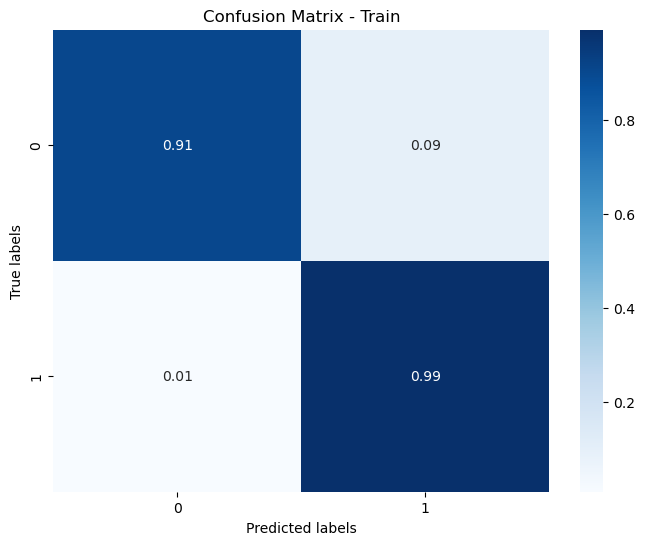

Confusion Matrix - Test:
[[ 158  115]
 [ 131 1572]]


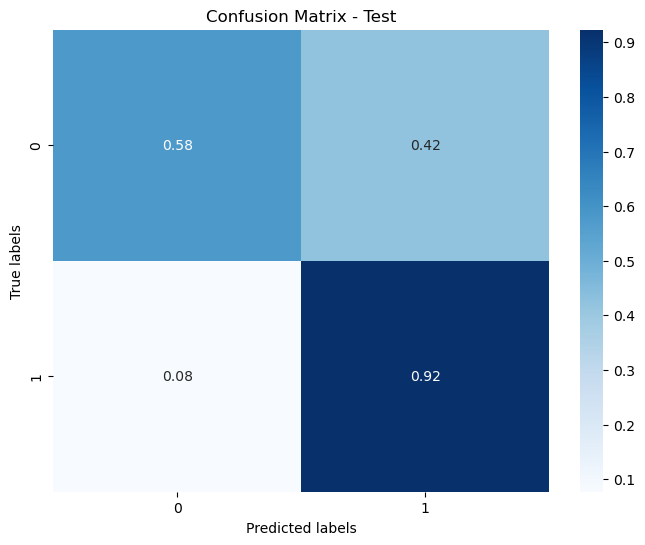

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.92       804
    Positive       0.99      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.96      0.95      0.96      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.55      0.58      0.56       273
    Positive       0.93      0.92      0.93      1703

    accuracy                           0.88      1976
   macro avg       0.74      0.75      0.74      1976
weighted avg       0.88      0.88      0.88      1976


Precision - Train: 0.979525551000314
Precision - Test: 0.8786244441380986

Recall - Train: 0.9797536696473764
Recall - Test: 0.8755060728744939

F1 Score - Train: 0.9795796410764417
F1 Score - Test: 0.8769844374422973

--------------------------------------------------
Evaluation Me

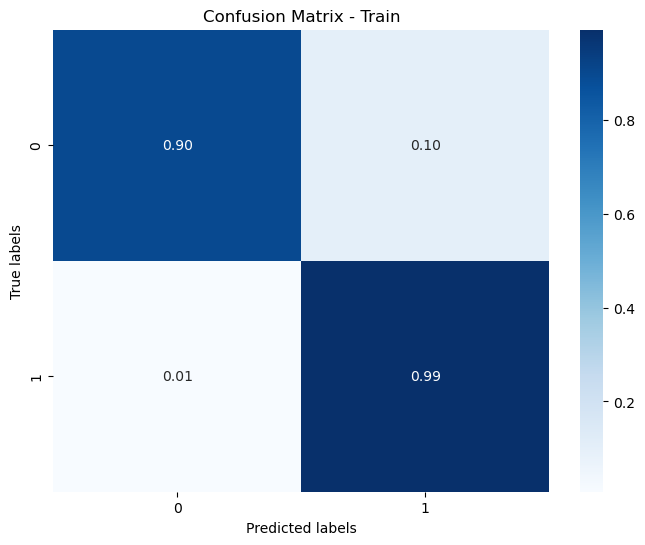

Confusion Matrix - Test:
[[ 128  145]
 [  25 1678]]


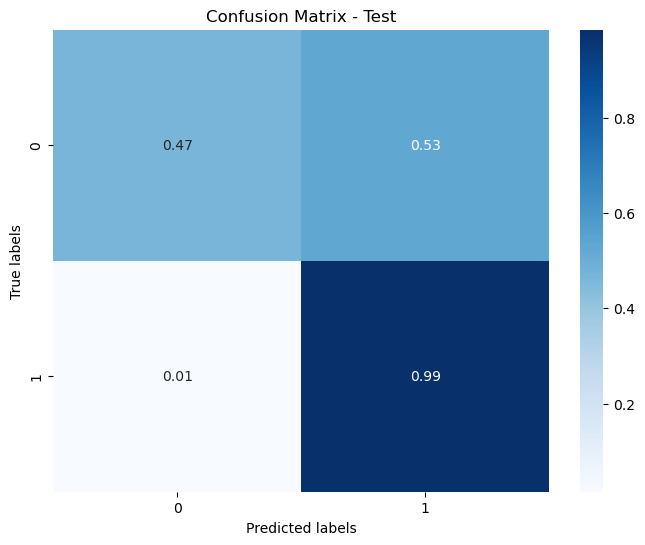

Classification Report - Train:
              precision    recall  f1-score   support

    Negative       0.95      0.90      0.92       804
    Positive       0.98      0.99      0.99      5123

    accuracy                           0.98      5927
   macro avg       0.97      0.95      0.96      5927
weighted avg       0.98      0.98      0.98      5927


Classification Report - Test:
              precision    recall  f1-score   support

    Negative       0.84      0.47      0.60       273
    Positive       0.92      0.99      0.95      1703

    accuracy                           0.91      1976
   macro avg       0.88      0.73      0.78      1976
weighted avg       0.91      0.91      0.90      1976


Precision - Train: 0.9795021187423615
Precision - Test: 0.9088749308656108

Recall - Train: 0.9797536696473764
Recall - Test: 0.9139676113360324

F1 Score - Train: 0.9795234942070784
F1 Score - Test: 0.9033143392702395

--------------------------------------------------


In [73]:
models = [lr_bert,knn_bert,dt_bert,rf_bert]
for model in models:
    print(f"Evaluation Metrics for {model} model")
    y_train_pred = model.predict(X_train_bert)
    y_test_pred = model.predict(X_test_bert)
    
    print()
    print('Train accuracy: ', accuracy_score(y_train, y_train_pred))
    print()
    print('Test accuracy: ', accuracy_score(y_test, y_test_pred))
    print()
    
    print('Confusion Matrix - Train:')
    train_cm = confusion_matrix(y_train, y_train_pred)
    print(train_cm)
    train_cm_norm = train_cm.astype('float') / train_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm_norm, annot=True, fmt= '.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Train')
    plt.show()
    
    print('Confusion Matrix - Test:')
    test_cm = confusion_matrix(y_test, y_test_pred)
    print(test_cm)
    test_cm_norm = test_cm.astype('float') / test_cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm_norm, annot=True, fmt='.2f', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - Test')
    plt.show()
    
    print('Classification Report - Train:')
    print(classification_report(y_train, y_train_pred))
    print()
    
    print('Classification Report - Test:')
    print(classification_report(y_test, y_test_pred))
    print()
    
    print('Precision - Train:', precision_score(y_train, y_train_pred, average='weighted'))
    print('Precision - Test:', precision_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('Recall - Train:', recall_score(y_train, y_train_pred, average='weighted'))
    print('Recall - Test:', recall_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('F1 Score - Train:', f1_score(y_train, y_train_pred, average='weighted'))
    print('F1 Score - Test:', f1_score(y_test, y_test_pred, average='weighted'))
    print()
    
    print('-'*50)

## Assesment of  the models based on f-1 score

### Bag of Words (BoW) Embedding:
* Logistic Regression: F1 Score - Test: 0.9239
* KNeighborsClassifier: F1 Score - Test: 0.9053
* MultinomialNB: F1 Score - Test: 0.9248
* DecisionTreeClassifier: F1 Score - Test: 0.9124
* RandomForestClassifier: F1 Score - Test: 0.9257

### TF-IDF Embedding:
* Logistic Regression: F1 Score - Test: 0.9117
* KNeighborsClassifier: F1 Score - Test: 0.8943
* MultinomialNB: F1 Score - Test: 0.8867
* DecisionTreeClassifier: F1 Score - Test: 0.8457
* RandomForestClassifier: F1 Score - Test: 0.8637

### Word2Vec Embedding:
* Logistic Regression: F1 Score - Test: 0.8026
* KNeighborsClassifier: F1 Score - Test: 0.8483
* DecisionTreeClassifier: F1 Score - Test: 0.8457
* RandomForestClassifier: F1 Score - Test: 0.8637

### BERT Embedding:
* Logistic Regression: F1 Score - Test: 0.9220
* KNeighborsClassifier: F1 Score - Test: 0.9180
* DecisionTreeClassifier: F1 Score - Test: 0.8799
* RandomForestClassifier: F1 Score - Test: 0.9190

### Based on the highest F1 scores:

* BoW with RandomForestClassifier has the highest F1 score of 0.9257.
* TF-IDF with Logistic Regression has the second-highest F1 score of 0.9117.
* Word2Vec with KNeighborsClassifier and BERT with RandomForestClassifier tie for the third-highest F1 score of 0.8483 and 0.9190 respectively.

In [91]:
import joblib

In [92]:
filename = "rf_bow.pkl"
joblib.dump(rf_bow, filename)

['rf_bow.pkl']

In [94]:
model = joblib.load('rf_bow.pkl')

In [95]:
y_test_pred = model.predict(X_test_bow)

In [96]:
print(accuracy_score(y_test,y_test_pred))

0.9281376518218624


In [93]:
filename = "vectorizer.pkl"
joblib.dump(vocab, filename)

['vectorizer.pkl']